In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import scipy
import statsmodels.api as sm
from bs4 import BeautifulSoup
import requests
import networkx as nx
import nltk

In [78]:
file_path="/content/DoctorVisits - DA.csv"
df=pd.read_csv(file_path)

In [79]:
print(df.head())

   Unnamed: 0  visits  gender   age  income  illness  reduced  health private  \
0           1       1  female  0.19    0.55        1        4       1     yes   
1           2       1  female  0.19    0.45        1        2       1     yes   
2           3       1    male  0.19    0.90        3        0       0      no   
3           4       1    male  0.19    0.15        1        0       0      no   
4           5       1    male  0.19    0.45        2        5       1      no   

  freepoor freerepat nchronic lchronic  
0       no        no       no       no  
1       no        no       no       no  
2       no        no       no       no  
3       no        no       no       no  
4       no        no      yes       no  


In [80]:
df.tail()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
5185,5186,0,female,0.22,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,0.27,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,0.37,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,0.52,0.65,0,0,0,no,no,no,no,no
5189,5190,0,male,0.72,0.25,0,0,0,no,no,yes,no,no


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [82]:
df.describe()

,Unnamed: 0,visits,age,income,illness,reduced,health
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,2595.500000,0.301734,0.406385,0.583160,1.431985,0.861850,1.217534
std,1498.368279,0.798134,0.204782,0.368907,1.384152,2.887628,2.124266
min,1.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000
25%,1298.250000,0.000000,0.220000,0.250000,0.000000,0.000000,0.000000
50%,2595.500000,0.000000,0.320000,0.550000,1.000000,0.000000,0.000000
75%,3892.750000,0.000000,0.620000,0.900000,2.000000,0.000000,2.000000
max,5190.000000,9.000000,0.720000,1.500000,5.000000,14.000000,12.000000


1.counting total no of visits.

In [83]:
from scipy import stats
z_scores = stats.zscore(df[['visits', 'income', 'age', 'illness']])
df = df[(z_scores < 3).all(axis=1)]

In [84]:
df['TotalVisits'] = df['visits'] + df['income'] + df['age'] + df['illness']
print(df['TotalVisits'])

0       2.74
1       2.64
2       5.09
3       2.34
4       3.64
        ... 
5185    0.77
5186    1.57
5187    1.62
5188    1.17
5189    0.97
Name: TotalVisits, Length: 5097, dtype: float64


In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['visits', 'income', 'age', 'illness']] = scaler.fit_transform(df[['visits', 'income', 'age', 'illness']])

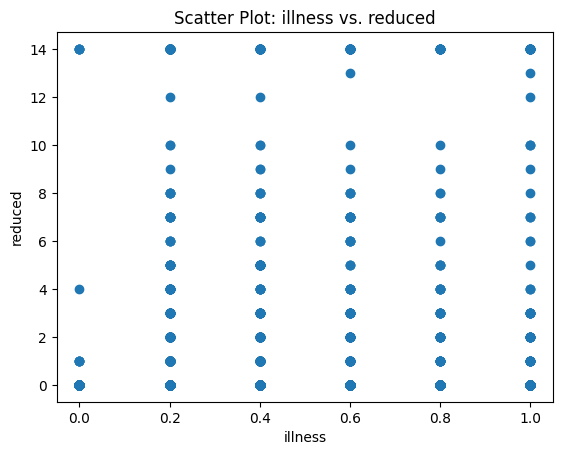

In [86]:
plt.scatter(df['illness'], df['reduced'])
plt.xlabel('illness')
plt.ylabel('reduced')
plt.title('Scatter Plot: illness vs. reduced')
plt.show()

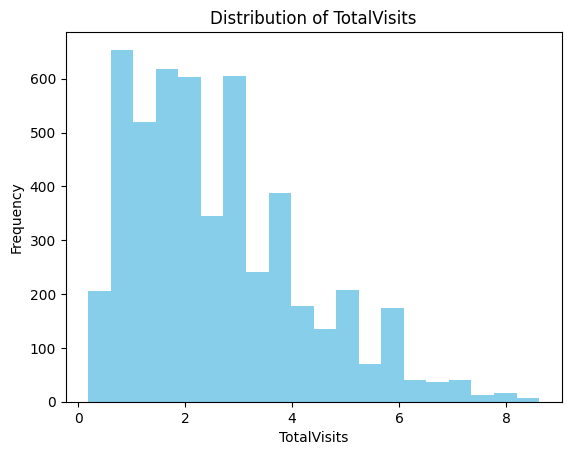

In [87]:
plt.hist(df['TotalVisits'], bins=20, color='skyblue')
plt.xlabel('TotalVisits')
plt.ylabel('Frequency')
plt.title('Distribution of TotalVisits')
plt.show()

2.Estimation of no of female and male visitors.


In [88]:
gender_mapping = {'female': 'yes', 'male': 'no'}
df['Gender_female'] = df['gender'].map(gender_mapping)
df['Gender_male'] = df['gender'].map(lambda x: 'yes' if x == 'male' else 'no')

In [89]:
df['Gender_female'] = df['gender'].apply(lambda x: gender_mapping.get(x, 'no'))
df['Gender_male'] = df['gender'].apply(lambda x: 'yes' if x == 'male' else 'no')
print(df)

      Unnamed: 0  visits  gender       age    income  illness  reduced  \
0              1     0.5  female  0.000000  0.366667      0.2        4   
1              2     0.5  female  0.000000  0.300000      0.2        2   
2              3     0.5    male  0.000000  0.600000      0.6        0   
3              4     0.5    male  0.000000  0.100000      0.2        0   
4              5     0.5    male  0.000000  0.300000      0.4        5   
...          ...     ...     ...       ...       ...      ...      ...   
5185        5186     0.0  female  0.056604  0.366667      0.0        0   
5186        5187     0.0    male  0.150943  0.866667      0.0        0   
5187        5188     0.0  female  0.339623  0.166667      0.2        0   
5188        5189     0.0  female  0.622642  0.433333      0.0        0   
5189        5190     0.0    male  1.000000  0.166667      0.0        0   

      health private freepoor freerepat nchronic lchronic  TotalVisits  \
0          1     yes       no        

In [90]:
gender_counts = df['gender'].value_counts()
female_visitors = gender_counts.get('female', 0)
male_visitors = gender_counts.get('male', 0)
print("Number of Female Visitors:", female_visitors)
print("Number of Male Visitors:", male_visitors)

Number of Female Visitors: 2650
Number of Male Visitors: 2447


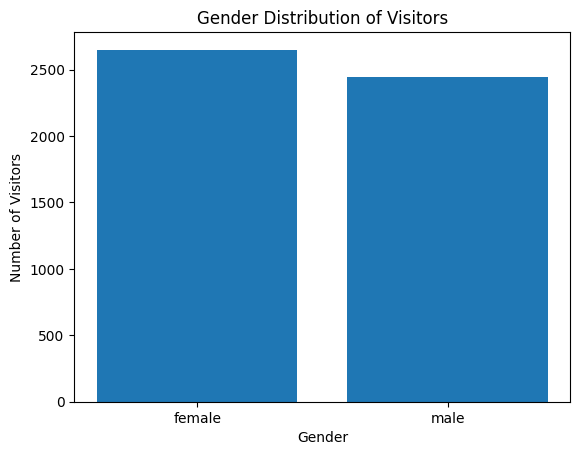

In [91]:
gender_counts = df['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Number of Visitors')
plt.title('Gender Distribution of Visitors')
plt.show()

3.Visits by Gender:

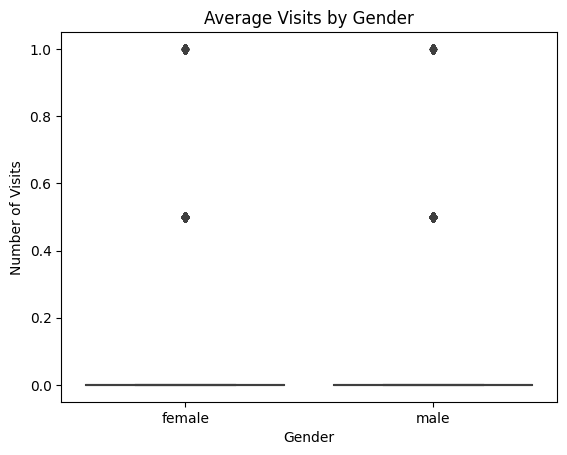

In [92]:
sns.boxplot(x='gender', y='visits', data=df)
plt.xlabel('Gender')
plt.ylabel('Number of Visits')
plt.title('Average Visits by Gender')
plt.show()

4.Income and Health:

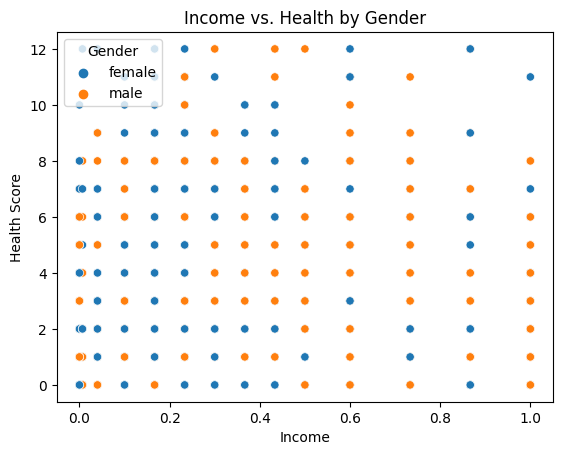

In [93]:
sns.scatterplot(x='income', y='health', hue='gender', data=df)
plt.xlabel('Income')
plt.ylabel('Health Score')
plt.title('Income vs. Health by Gender')
plt.legend(title='Gender', loc='upper left')
plt.show()

5.Reduced and Private Health Services:

<ipython-input-94-0de658df7ac3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  reduced_private_counts = df.groupby('gender')['reduced', 'private'].sum()
<ipython-input-94-0de658df7ac3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  reduced_private_counts = df.groupby('gender')['reduced', 'private'].sum()


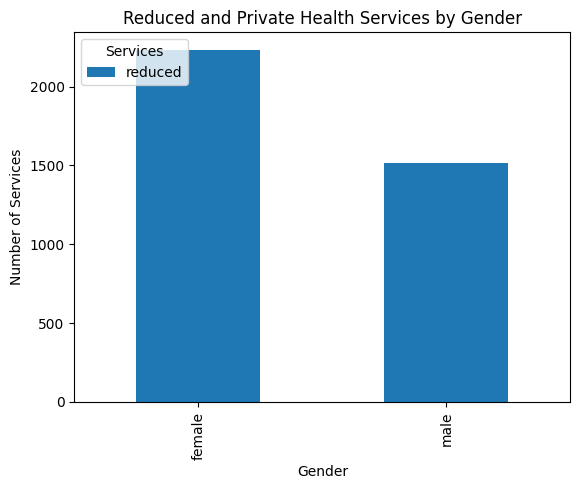

In [94]:
reduced_private_counts = df.groupby('gender')['reduced', 'private'].sum()
reduced_private_counts.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Number of Services')
plt.title('Reduced and Private Health Services by Gender')
plt.legend(title='Services', loc='upper left')
plt.show()

6.Age Distribution:

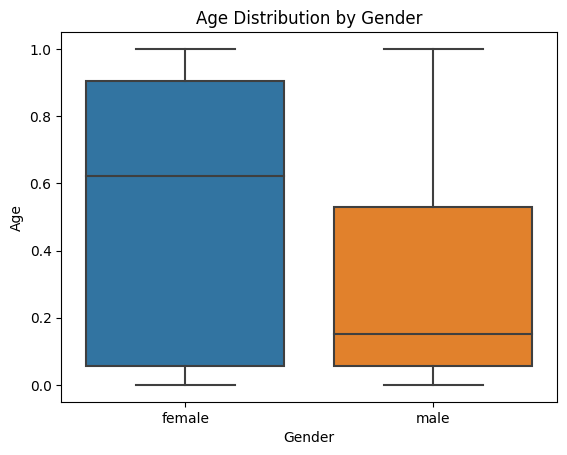

In [95]:
sns.boxplot(x='gender', y='age', data=df)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender')
plt.show()

7.Illness and Chronic Conditions:

<ipython-input-96-c3cbbc2ab5a1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  illness_chronic_avg = df.groupby('gender')['illness', 'nchronic'].mean()
<ipython-input-96-c3cbbc2ab5a1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  illness_chronic_avg = df.groupby('gender')['illness', 'nchronic'].mean()


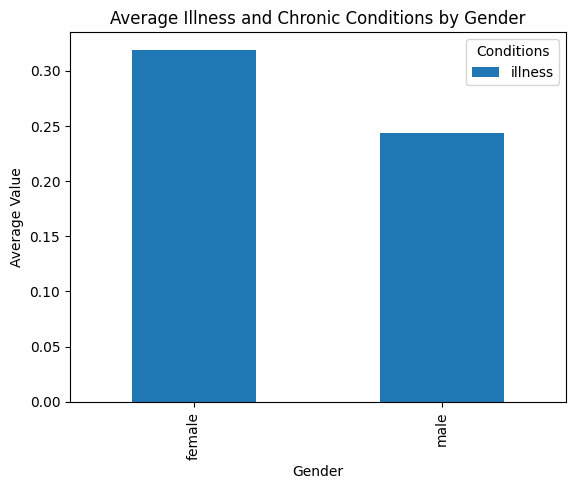

In [96]:
illness_chronic_avg = df.groupby('gender')['illness', 'nchronic'].mean()
illness_chronic_avg.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Average Value')
plt.title('Average Illness and Chronic Conditions by Gender')
plt.legend(title='Conditions', loc='upper right')
plt.show()

8.Correlations:

<ipython-input-97-182fd031f822>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


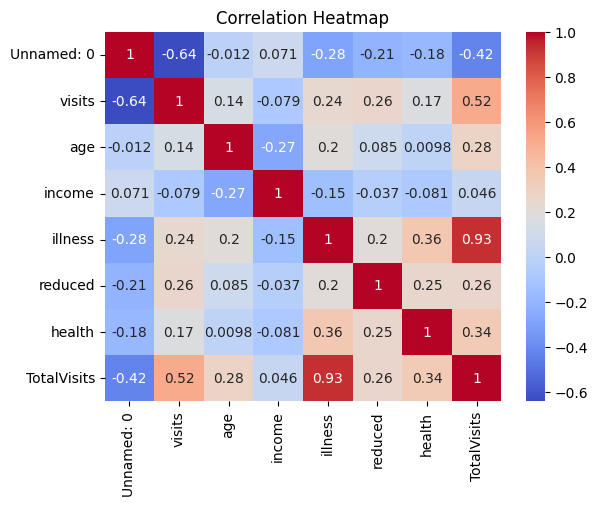

In [97]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

9.Statistical Analysis:

 Perform t-test to compare the average visits between male and female visitors

In [98]:
import scipy.stats as stats
male_visits = df[df['gender'] == 'male']['visits']
female_visits = df[df['gender'] == 'female']['visits']
t_statistic, p_value = stats.ttest_ind(male_visits, female_visits)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -7.727280691873556
P-value: 1.3145367275016164e-14


10.Predictive Modeling:
Predict visits using linear regression

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = df[['age', 'income', 'illness', 'reduced', 'health']]
y = df['visits']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.05562390261085415


11.Clustering:
Perform K-means clustering on age and income

In [100]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X_clustering = df[['age', 'income']]

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_clustering)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


12. Visualize the clusters

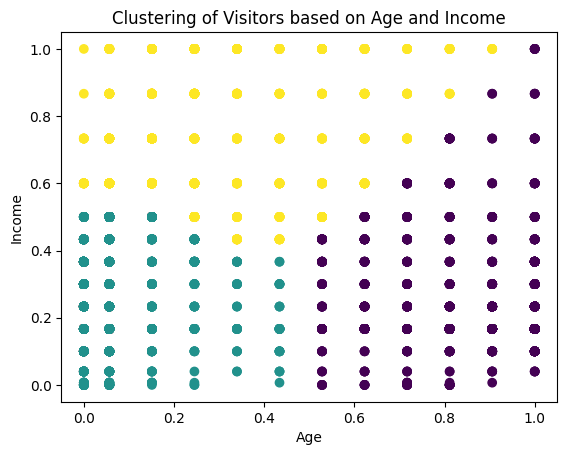

In [101]:
plt.scatter(X_clustering['age'], X_clustering['income'], c=df['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clustering of Visitors based on Age and Income')
plt.show()

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
X = df[['age', 'income', 'illness', 'reduced', 'health']]
y = df['visits']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


In [108]:
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 0.05562390261085415
R-squared: 0.11581017438491903
